In [1]:
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
import yfinance as yf
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage
# pyfolio  qgrid empyrical
import pickle

In [2]:
ticker_list =pd.read_excel('ibov.xlsx')

In [3]:
ticker_list.columns

Index(['Ticker', 'Stock', 'Type', 'Theoretical Quantity', 'Part. (%)'], dtype='object')

In [4]:
ticker_list['Ticker'].str

In [5]:
ticker_list['Ticker'] = ticker_list['Ticker'].astype(str) +'.SA'

In [6]:
ticker_list =(' ').join(ticker_list['Ticker'].to_list()+['SPY','BRL=X','DAX','^N225','^BVSP'])

In [7]:
ticker_list 

'ABEV3.SA AZUL4.SA B3SA3.SA BBAS3.SA BBDC3.SA BBDC4.SA BBSE3.SA BPAC11.SA BRAP4.SA BRDT3.SA BRFS3.SA BRKM5.SA BRML3.SA BTOW3.SA CCRO3.SA CIEL3.SA CMIG4.SA COGN3.SA CSAN3.SA CSNA3.SA CVCB3.SA CYRE3.SA ECOR3.SA EGIE3.SA ELET3.SA ELET6.SA EMBR3.SA ENBR3.SA EQTL3.SA FLRY3.SA GGBR4.SA GNDI3.SA GOAU4.SA GOLL4.SA HYPE3.SA IGTA3.SA IRBR3.SA ITSA4.SA ITUB4.SA JBSS3.SA KLBN11.SA LAME4.SA LREN3.SA MGLU3.SA MRFG3.SA MRVE3.SA MULT3.SA NATU3.SA PCAR4.SA PETR3.SA PETR4.SA QUAL3.SA RADL3.SA RAIL3.SA RENT3.SA SANB11.SA SBSP3.SA SMLS3.SA SUZB3.SA TAEE11.SA TIMP3.SA UGPA3.SA USIM5.SA VALE3.SA VIVT4.SA VVAR3.SA WEGE3.SA YDUQ3.SA nan.SA nan.SA SPY BRL=X DAX ^N225 ^BVSP'

In [20]:
data1 = yf.download(['^BVSP','BPAN4.SA'],period='10y')

[*********************100%***********************]  2 of 2 completed


In [15]:
data

Adj Close              Close               High            \
             BPAN4.SA     ^BVSP BPAN4.SA     ^BVSP BPAN4.SA     ^BVSP   
Date                                                                    
2010-01-26  10.566926   65524.0    11.14   65524.0    11.35   66213.0   
2010-01-27  10.434128   65070.0    11.00   65070.0    11.30   65663.0   
2010-01-28  10.386699   65588.0    10.95   65588.0    11.22   66049.0   
2010-01-29  10.367729   65402.0    10.93   65402.0    11.20   66576.0   
2010-02-01  10.149560   66572.0    10.70   66572.0    10.99   66763.0   
...               ...       ...      ...       ...      ...       ...   
2020-01-20  11.250000  118862.0    11.25  118862.0    11.55  118862.0   
2020-01-21  10.700000  117026.0    10.70  117026.0    11.34  118861.0   
2020-01-22  10.600000  118391.0    10.60  118391.0    10.93  118401.0   
2020-01-23  10.640000  119528.0    10.64  119528.0    10.78  119535.0   
2020-01-24  10.380000  118376.0    10.38  118376.0    10.77  119593.0   

                Low               Open               Volume             
           BPAN4.SA     ^BVSP BPAN4.SA     ^BVSP   BPAN4.SA      ^BVSP  
Date                                                                    
2010-01-26    10.91   64719.0    11.35   66213.0   186400.0  1990400.0  
2010-01-27    10.90   64553.0    10.90   65527.0   201400.0  1813600.0  
2010-01-28    10.70   64541.0    11.01   65071.0   235700.0  1649400.0  
2010-01-29    10.63   65140.0    10.85   65591.0   299800.0  1823200.0  
2010-02-01    10.65   65362.0    10.97   65402.0   185900.0  1494400.0  
...             ...       ...      ...       ...        ...        ...  
2020-01-20    11.10  117928.0    11.55  118478.0  3361100.0  3843500.0  
2020-01-21    10.62  117026.0    11.23  118861.0  7322500.0  5085600.0  
2020-01-22    10.27  117035.0    10.84  117035.0  6625000.0  5765700.0  
2020-01-23    10.41  116906.0    10.59  118391.0  3517100.0  6572400.0  
2020-01-24    10.35  118108.0    10.68  119528.0  3839900.0  4778700.0  

[2480 rows x 12 columns]

In [8]:
data = yf.download(ticker_list,period='10y')

[*********************100%***********************]  74 of 74 completed

1 Failed download:
- NAN.SA: No data found, symbol may be delisted


In [16]:
with open('C:\\Users\\Rafael\\Trading\\Trading\\ibov.pkl','rb') as file:
     data =pickle.load(file)

In [23]:
data.loc[:,(slice(None),'^BVSP')]=data1.loc[:,(slice(None),'^BVSP')]

In [32]:
data1.columns

MultiIndex([('Adj Close', 'BPAN4.SA'),
            ('Adj Close',    '^BVSP'),
            (    'Close', 'BPAN4.SA'),
            (    'Close',    '^BVSP'),
            (     'High', 'BPAN4.SA'),
            (     'High',    '^BVSP'),
            (      'Low', 'BPAN4.SA'),
            (      'Low',    '^BVSP'),
            (     'Open', 'BPAN4.SA'),
            (     'Open',    '^BVSP'),
            (   'Volume', 'BPAN4.SA'),
            (   'Volume',    '^BVSP')],
           )

In [34]:
data1[:,(slice(None),'^BVSP')]

TypeError: '(slice(None, None, None), (slice(None, None, None), '^BVSP'))' is an invalid key

In [40]:
data=pd.concat([data,data1.loc[:,(slice(None),'BPAN4.SA')]],axis=1)

In [41]:
with open('ibov.pkl','wb') as file:
     pickle.dump(data,file, protocol=pickle.HIGHEST_PROTOCOL)


In [10]:
data

Adj Close                                                         \
             ABEV3.SA   AZUL4.SA   B3SA3.SA   BBAS3.SA   BBDC3.SA   BBDC4.SA   
Date                                                                           
2010-01-26   2.636304        NaN        NaN  15.928211   8.324152   9.723069   
2010-01-27   2.608284        NaN        NaN  15.802022   8.166461   9.506925   
2010-01-28   2.611998        NaN        NaN  15.830702   8.226402   9.668230   
2010-01-29   2.531822        NaN        NaN  16.117485   8.103431   9.537341   
2010-02-01   2.557143        NaN        NaN  17.207285   8.198012   9.698713   
...               ...        ...        ...        ...        ...        ...   
2020-01-20  18.799999  61.770000  45.500000  49.799999  33.060001  34.759998   
2020-01-21  18.740000  60.049999  44.700001  48.360001  31.910000  33.599998   
2020-01-22  19.049999  59.599998  47.500000  48.740002  32.180000  33.720001   
2020-01-23  18.650000  61.200001  48.700001  51.480000  33.049999  34.610001   
2020-01-24  18.990000  59.459999  48.990002  50.799999  32.869999  34.349998   

                                                        ...      Volume  \
             BBSE3.SA  BPAC11.SA   BRAP4.SA   BRDT3.SA  ...    TIMP3.SA   
Date                                                    ...               
2010-01-26        NaN        NaN  24.755247        NaN  ...    270000.0   
2010-01-27        NaN        NaN  24.570032        NaN  ...    231900.0   
2010-01-28        NaN        NaN  24.461456        NaN  ...    645000.0   
2010-01-29        NaN        NaN  24.793568        NaN  ...    484700.0   
2010-02-01        NaN        NaN  25.547211        NaN  ...    161900.0   
...               ...        ...        ...        ...  ...         ...   
2020-01-20  36.160000  76.809998  42.389999  29.129999  ...   2804100.0   
2020-01-21  36.000000  77.349998  41.590000  28.700001  ...  10266900.0   
2020-01-22  36.189999  78.279999  42.250000  29.049999  ...   7003200.0   
2020-01-23  36.240002  78.349998  41.660000  29.469999  ...   6617500.0   
2020-01-24  35.900002  78.349998  40.840000  29.590000  ...   6403100.0   

                                                                      \
             UGPA3.SA    USIM5.SA    VALE3.SA   VIVT4.SA    VVAR3.SA   
Date                                                                   
2010-01-26        0.0   7080400.0   4364100.0    80927.0      6800.0   
2010-01-27        0.0   5392000.0   3296100.0   116098.0      4400.0   
2010-01-28        0.0   6728800.0   2382800.0   201279.0      4400.0   
2010-01-29        0.0   6946000.0   3402000.0   123984.0     44400.0   
2010-02-01        0.0   4063800.0   2664600.0    86633.0     15600.0   
...               ...         ...         ...        ...         ...   
2020-01-20  2774400.0  10085000.0  16746300.0   796300.0  51978100.0   
2020-01-21  4399700.0   8097500.0  25436800.0  1907000.0  35784700.0   
2020-01-22  4005700.0  64889200.0  17269400.0  2253300.0  50320000.0   
2020-01-23  3807200.0  52788300.0  23028900.0  2316900.0  51184100.0   
2020-01-24  3700500.0  36859100.0  19744800.0   995600.0  49654600.0   

                                                       
             WEGE3.SA   YDUQ3.SA      ^BVSP     ^N225  
Date                                                   
2010-01-26  1336114.0        NaN  1990400.0  175400.0  
2010-01-27   527280.0        NaN  1813600.0  139500.0  
2010-01-28  1323608.0        NaN  1649400.0  168000.0  
2010-01-29   402220.0        NaN  1823200.0  156800.0  
2010-02-01   481312.0        NaN  1494400.0  161900.0  
...               ...        ...        ...       ...  
2020-01-20  2245100.0  2594800.0  3843500.0   38300.0  
2020-01-21  3066900.0  2675800.0  5085600.0   44600.0  
2020-01-22  2583100.0  2668400.0  5765700.0   49000.0  
2020-01-23  4355600.0  1964600.0  6572400.0   55500.0  
2020-01-24  5073000.0  1775400.0  4778700.0   48700.0  

[2609 rows x 444 columns]

In [405]:
data[('Adj Close','SPYBRL')] =(data[('Adj Close','SPY')]*data[('Adj Close','BRL=X')])

In [571]:
data1 =data[data.index<'2018-11-01']

In [572]:
teste =data[data.index>='2018-12-01']

In [573]:
data1['Adj Close'].columns[:]

Index(['ABEV3.SA', 'AZUL4.SA', 'B3SA3.SA', 'BBAS3.SA', 'BBDC3.SA', 'BBDC4.SA',
       'BBSE3.SA', 'BPAC11.SA', 'BRAP4.SA', 'BRDT3.SA', 'BRFS3.SA', 'BRKM5.SA',
       'BRL=X', 'BRML3.SA', 'BTOW3.SA', 'CCRO3.SA', 'CIEL3.SA', 'CMIG4.SA',
       'COGN3.SA', 'CSAN3.SA', 'CSNA3.SA', 'CVCB3.SA', 'CYRE3.SA', 'DAX',
       'ECOR3.SA', 'EGIE3.SA', 'ELET3.SA', 'ELET6.SA', 'EMBR3.SA', 'ENBR3.SA',
       'EQTL3.SA', 'FLRY3.SA', 'GGBR4.SA', 'GNDI3.SA', 'GOAU4.SA', 'GOLL4.SA',
       'HYPE3.SA', 'IGTA3.SA', 'IRBR3.SA', 'ITSA4.SA', 'ITUB4.SA', 'JBSS3.SA',
       'KLBN11.SA', 'LAME4.SA', 'LREN3.SA', 'MGLU3.SA', 'MRFG3.SA', 'MRVE3.SA',
       'MULT3.SA', 'NAN.SA', 'NATU3.SA', 'PCAR4.SA', 'PETR3.SA', 'PETR4.SA',
       'QUAL3.SA', 'RADL3.SA', 'RAIL3.SA', 'RENT3.SA', 'SANB11.SA', 'SBSP3.SA',
       'SMLS3.SA', 'SPY', 'SUZB3.SA', 'TAEE11.SA', 'TIMP3.SA', 'UGPA3.SA',
       'USIM5.SA', 'VALE3.SA', 'VIVT4.SA', 'VVAR3.SA', 'WEGE3.SA', 'YDUQ3.SA',
       '^BVSP', '^N225', 'SPYBRL'],
      dtype='object')

In [574]:
data2 =data1['Adj Close'].dropna(axis=1,thresh=500).dropna(axis=0)#.drop(['FLRY3.SA','BRL=X'],axis=1)

In [302]:
#data2 =data2[data2.columns[:-2]]

In [575]:
teste =teste['Adj Close']

In [576]:
cov_matrix =data2.cov()

In [577]:
data1.columns

MultiIndex(levels=[['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], ['ABEV3.SA', 'AZUL4.SA', 'B3SA3.SA', 'BBAS3.SA', 'BBDC3.SA', 'BBDC4.SA', 'BBSE3.SA', 'BPAC11.SA', 'BRAP4.SA', 'BRDT3.SA', 'BRFS3.SA', 'BRKM5.SA', 'BRL=X', 'BRML3.SA', 'BTOW3.SA', 'CCRO3.SA', 'CIEL3.SA', 'CMIG4.SA', 'COGN3.SA', 'CSAN3.SA', 'CSNA3.SA', 'CVCB3.SA', 'CYRE3.SA', 'DAX', 'ECOR3.SA', 'EGIE3.SA', 'ELET3.SA', 'ELET6.SA', 'EMBR3.SA', 'ENBR3.SA', 'EQTL3.SA', 'FLRY3.SA', 'GGBR4.SA', 'GNDI3.SA', 'GOAU4.SA', 'GOLL4.SA', 'HYPE3.SA', 'IGTA3.SA', 'IRBR3.SA', 'ITSA4.SA', 'ITUB4.SA', 'JBSS3.SA', 'KLBN11.SA', 'LAME4.SA', 'LREN3.SA', 'MGLU3.SA', 'MRFG3.SA', 'MRVE3.SA', 'MULT3.SA', 'NAN.SA', 'NATU3.SA', 'PCAR4.SA', 'PETR3.SA', 'PETR4.SA', 'QUAL3.SA', 'RADL3.SA', 'RAIL3.SA', 'RENT3.SA', 'SANB11.SA', 'SBSP3.SA', 'SMLS3.SA', 'SPY', 'SUZB3.SA', 'TAEE11.SA', 'TIMP3.SA', 'UGPA3.SA', 'USIM5.SA', 'VALE3.SA', 'VIVT4.SA', 'VVAR3.SA', 'WEGE3.SA', 'YDUQ3.SA', '^BVSP', '^N225', 'SPYBRL']],
           codes=[[0, 0, 0, 0, 0, 0, 0, 

In [578]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt.risk_models import exp_cov,semicovariance,sample_cov
from pypfopt.cla import CLA 

In [579]:
mu = mean_historical_return(data2)
S = semicovariance(data2)

In [580]:
ef =CLA(mu, S, weight_bounds=(0,1))

In [581]:
ef.max_sharpe()

{'ABEV3.SA': 0.0,
 'B3SA3.SA': 0.0,
 'BBAS3.SA': 0.0,
 'BBDC3.SA': 0.0,
 'BBDC4.SA': 0.0,
 'BBSE3.SA': 0.0,
 'BRAP4.SA': 0.0,
 'BRFS3.SA': 0.0,
 'BRKM5.SA': 0.19227667181879224,
 'BRL=X': 0.03626705670328446,
 'BRML3.SA': 0.0,
 'BTOW3.SA': 0.0,
 'CCRO3.SA': 0.0,
 'CIEL3.SA': 0.0,
 'CMIG4.SA': 0.0,
 'CSAN3.SA': 0.0,
 'CSNA3.SA': 0.0,
 'CVCB3.SA': 0.039725448993006465,
 'CYRE3.SA': 0.0,
 'DAX': 0.0,
 'ECOR3.SA': 0.0,
 'EGIE3.SA': 0.0,
 'ELET3.SA': 0.0,
 'ELET6.SA': 0.0,
 'EMBR3.SA': 0.0,
 'ENBR3.SA': 0.0,
 'EQTL3.SA': 0.0,
 'FLRY3.SA': 0.2654657821639028,
 'GGBR4.SA': 0.0,
 'GOAU4.SA': 0.0,
 'GOLL4.SA': 0.0,
 'HYPE3.SA': 0.0,
 'IGTA3.SA': 0.0,
 'ITSA4.SA': 0.0,
 'ITUB4.SA': 0.0,
 'JBSS3.SA': 0.0,
 'LAME4.SA': 0.0,
 'LREN3.SA': 0.0,
 'MGLU3.SA': 0.17268704651109815,
 'MRFG3.SA': 0.0,
 'MRVE3.SA': 0.0,
 'MULT3.SA': 0.0,
 'NATU3.SA': 0.0,
 'PCAR4.SA': 0.0,
 'PETR3.SA': 0.0,
 'PETR4.SA': 0.0,
 'QUAL3.SA': 0.0,
 'RADL3.SA': 0.1479238719677948,
 'RAIL3.SA': 0.0,
 'RENT3.SA': 0.0,
 'SANB11.SA':

In [582]:
k =ef.efficient_frontier(points=1000)

In [583]:
ef.portfolio_performance(verbose=True,risk_free_rate=0.05)

Expected annual return: 65.9%
Annual volatility: 11.7%
Sharpe Ratio: 5.22


(0.6588196837549862, 0.11660281944428574, 5.221311857265061)

In [584]:
ef.max_sharpe()

{'ABEV3.SA': 0.0,
 'B3SA3.SA': 0.0,
 'BBAS3.SA': 0.0,
 'BBDC3.SA': 0.0,
 'BBDC4.SA': 0.0,
 'BBSE3.SA': 0.0,
 'BRAP4.SA': 0.0,
 'BRFS3.SA': 0.0,
 'BRKM5.SA': 0.19227667181879224,
 'BRL=X': 0.03626705670328446,
 'BRML3.SA': 0.0,
 'BTOW3.SA': 0.0,
 'CCRO3.SA': 0.0,
 'CIEL3.SA': 0.0,
 'CMIG4.SA': 0.0,
 'CSAN3.SA': 0.0,
 'CSNA3.SA': 0.0,
 'CVCB3.SA': 0.039725448993006465,
 'CYRE3.SA': 0.0,
 'DAX': 0.0,
 'ECOR3.SA': 0.0,
 'EGIE3.SA': 0.0,
 'ELET3.SA': 0.0,
 'ELET6.SA': 0.0,
 'EMBR3.SA': 0.0,
 'ENBR3.SA': 0.0,
 'EQTL3.SA': 0.0,
 'FLRY3.SA': 0.2654657821639028,
 'GGBR4.SA': 0.0,
 'GOAU4.SA': 0.0,
 'GOLL4.SA': 0.0,
 'HYPE3.SA': 0.0,
 'IGTA3.SA': 0.0,
 'ITSA4.SA': 0.0,
 'ITUB4.SA': 0.0,
 'JBSS3.SA': 0.0,
 'LAME4.SA': 0.0,
 'LREN3.SA': 0.0,
 'MGLU3.SA': 0.17268704651109815,
 'MRFG3.SA': 0.0,
 'MRVE3.SA': 0.0,
 'MULT3.SA': 0.0,
 'NATU3.SA': 0.0,
 'PCAR4.SA': 0.0,
 'PETR3.SA': 0.0,
 'PETR4.SA': 0.0,
 'QUAL3.SA': 0.0,
 'RADL3.SA': 0.1479238719677948,
 'RAIL3.SA': 0.0,
 'RENT3.SA': 0.0,
 'SANB11.SA':

In [585]:
ef.min_volatility()

{'ABEV3.SA': 0.08366694911465172,
 'B3SA3.SA': 0.0,
 'BBAS3.SA': 0.0,
 'BBDC3.SA': 0.0,
 'BBDC4.SA': 0.0,
 'BBSE3.SA': 0.0,
 'BRAP4.SA': 0.0,
 'BRFS3.SA': 0.00761611273100897,
 'BRKM5.SA': 0.009818848333130363,
 'BRL=X': 0.29679037014840653,
 'BRML3.SA': 0.0,
 'BTOW3.SA': 0.0,
 'CCRO3.SA': 0.0,
 'CIEL3.SA': 0.0,
 'CMIG4.SA': 0.0,
 'CSAN3.SA': 0.0,
 'CSNA3.SA': 0.0,
 'CVCB3.SA': 0.0,
 'CYRE3.SA': 0.0,
 'DAX': 0.0,
 'ECOR3.SA': 0.0,
 'EGIE3.SA': 0.015867721202510593,
 'ELET3.SA': 0.0,
 'ELET6.SA': 0.0,
 'EMBR3.SA': 0.019628189791437912,
 'ENBR3.SA': 0.0,
 'EQTL3.SA': 0.053771180821046156,
 'FLRY3.SA': 0.05213227849711508,
 'GGBR4.SA': 0.0,
 'GOAU4.SA': 0.0,
 'GOLL4.SA': 0.0,
 'HYPE3.SA': 0.012564196525266334,
 'IGTA3.SA': 0.0,
 'ITSA4.SA': 0.0,
 'ITUB4.SA': 0.0,
 'JBSS3.SA': 0.0,
 'LAME4.SA': 0.0,
 'LREN3.SA': 0.0,
 'MGLU3.SA': 0.0,
 'MRFG3.SA': 0.014475306974652066,
 'MRVE3.SA': 0.0,
 'MULT3.SA': 0.0,
 'NATU3.SA': 0.0,
 'PCAR4.SA': 0.0,
 'PETR3.SA': 0.0,
 'PETR4.SA': 0.0,
 'QUAL3.SA': 0

In [586]:
df =pd.concat([pd.Series(k[0]),pd.Series(k[1   ])],axis=1)

In [587]:
import seaborn as sb

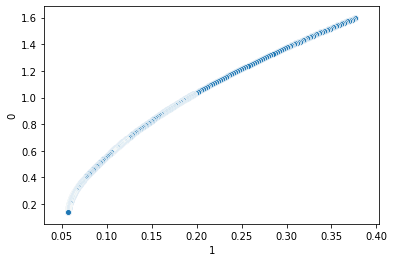

In [588]:
sb.scatterplot(data=df,x=1,y=0)

In [591]:
ef = EfficientFrontier(mu, S,gamma=1)
weights = ef.max_sharpe()

In [592]:
cleaned_weights = ef.clean_weights()
print(cleaned_weights)

{'ABEV3.SA': 0.0, 'B3SA3.SA': 0.0, 'BBAS3.SA': 0.0, 'BBDC3.SA': 0.0, 'BBDC4.SA': 0.0, 'BBSE3.SA': 0.0, 'BRAP4.SA': 0.0, 'BRFS3.SA': 0.0, 'BRKM5.SA': 0.18537, 'BRL=X': 0.0681, 'BRML3.SA': 0.0, 'BTOW3.SA': 0.0, 'CCRO3.SA': 0.0, 'CIEL3.SA': 0.0, 'CMIG4.SA': 0.0, 'CSAN3.SA': 0.0, 'CSNA3.SA': 0.0, 'CVCB3.SA': 0.04837, 'CYRE3.SA': 0.0, 'DAX': 0.0, 'ECOR3.SA': 0.0, 'EGIE3.SA': 0.0, 'ELET3.SA': 0.0, 'ELET6.SA': 0.0, 'EMBR3.SA': 0.0, 'ENBR3.SA': 0.0, 'EQTL3.SA': 0.02572, 'FLRY3.SA': 0.23832, 'GGBR4.SA': 0.0, 'GOAU4.SA': 0.0, 'GOLL4.SA': 0.0, 'HYPE3.SA': 0.0, 'IGTA3.SA': 0.0, 'ITSA4.SA': 0.0, 'ITUB4.SA': 0.0, 'JBSS3.SA': 0.0, 'LAME4.SA': 0.0, 'LREN3.SA': 0.0, 'MGLU3.SA': 0.17347, 'MRFG3.SA': 0.00287, 'MRVE3.SA': 0.0, 'MULT3.SA': 0.0, 'NATU3.SA': 0.0, 'PCAR4.SA': 0.0, 'PETR3.SA': 0.0, 'PETR4.SA': 0.0, 'QUAL3.SA': 0.0, 'RADL3.SA': 0.13681, 'RAIL3.SA': 0.0, 'RENT3.SA': 0.0, 'SANB11.SA': 0.0, 'SBSP3.SA': 0.0, 'SMLS3.SA': 0.0, 'SPY': 0.0, 'TIMP3.SA': 0.0, 'UGPA3.SA': 0.0, 'USIM5.SA': 0.0, 'VALE3.SA':

In [593]:
ef.portfolio_performance(verbose=True)

Expected annual return: 64.8%
Annual volatility: 11.5%
Sharpe Ratio: 5.47


(0.647656947428203, 0.11479873018036377, 5.467455488767795)

In [ ]:
#,gamma=10

In [594]:

from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
cleaned_weights = ef.min_volatility()
latest_prices = get_latest_prices(data2)
da = DiscreteAllocation(cleaned_weights, latest_prices, total_portfolio_value=1000)
allocation, leftover = da.lp_portfolio()
print(allocation)

9 out of 64 tickers were removed
{'ABEV3.SA': 1, 'B3SA3.SA': 1, 'BBDC3.SA': 1, 'BBDC4.SA': 1, 'BBSE3.SA': 1, 'BRAP4.SA': 1, 'BRFS3.SA': 1, 'BRKM5.SA': 1, 'BRL=X': 8, 'BRML3.SA': 1, 'BTOW3.SA': 0, 'CCRO3.SA': 1, 'CIEL3.SA': 1, 'CSAN3.SA': 1, 'CVCB3.SA': 0, 'CYRE3.SA': 1, 'DAX': 1, 'ECOR3.SA': 2, 'EGIE3.SA': 1, 'ELET3.SA': 1, 'ELET6.SA': 1, 'EMBR3.SA': 1, 'ENBR3.SA': 2, 'EQTL3.SA': 0, 'FLRY3.SA': 1, 'GGBR4.SA': 1, 'HYPE3.SA': 1, 'IGTA3.SA': 1, 'ITSA4.SA': 1, 'ITUB4.SA': 1, 'JBSS3.SA': 2, 'LAME4.SA': 1, 'LREN3.SA': 1, 'MGLU3.SA': 1, 'MRFG3.SA': 3, 'MRVE3.SA': 2, 'MULT3.SA': 1, 'NATU3.SA': 1, 'PCAR4.SA': 0, 'QUAL3.SA': 1, 'RADL3.SA': 0, 'RENT3.SA': 1, 'SANB11.SA': 1, 'SBSP3.SA': 1, 'SMLS3.SA': 0, 'SPY': 0, 'TIMP3.SA': 2, 'UGPA3.SA': 1, 'VALE3.SA': 0, 'VIVT4.SA': 1, 'VVAR3.SA': 2, 'WEGE3.SA': 1, '^BVSP': 0, '^N225': 0, 'SPYBRL': 0}


In [595]:
allocation.values()

dict_values([1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 2, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 2, 1, 0, 1, 2, 1, 0, 0, 0])

In [596]:
c =(teste['SPY'].dropna()/teste['SPY'].dropna()[1])

In [597]:
b =(teste['^BVSP'].dropna()/teste['^BVSP'].dropna()[1])

In [598]:
list(allocation.values())

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 8,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 3,
 2,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 2,
 1,
 0,
 1,
 2,
 1,
 0,
 0,
 0]

In [608]:
a =((abs(teste[allocation.keys()]*list(allocation.values())).dropna(thresh=10).sum(axis=1))/1000)

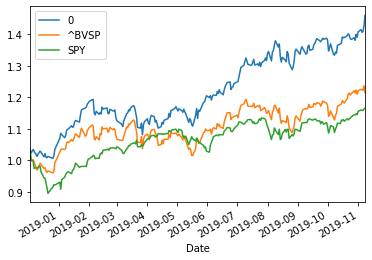

In [609]:
pd.concat([a,b,c],axis=1).dropna().plot()

In [83]:
ef = EfficientFrontier(mu, S, weight_bounds=(-1,1))

In [85]:
ef.max_sharpe()

{'ABEV3.SA': -0.18782420811204345,
 'B3SA3.SA': 0.2552131907340352,
 'BBAS3.SA': -0.1760490961937194,
 'BBDC3.SA': -0.6420227827186367,
 'BBDC4.SA': 0.6889267236531893,
 'BBSE3.SA': -0.10841250219406032,
 'BRAP4.SA': 0.4013800811002692,
 'BRFS3.SA': -0.06743506173724857,
 'BRKM5.SA': 0.09992756859053731,
 'BRL=X': 0.4824732999298338,
 'BRML3.SA': -0.23162561061943585,
 'BTOW3.SA': -0.07707195423670107,
 'CCRO3.SA': -0.03787378102826306,
 'CIEL3.SA': -0.1054641170756981,
 'CMIG4.SA': -0.25756915085749865,
 'CSAN3.SA': -0.0914153532064096,
 'CSNA3.SA': 0.002806247671825725,
 'CVCB3.SA': 0.11461475412353693,
 'CYRE3.SA': -0.14151202430707427,
 'DAX': -0.09515139976165223,
 'ECOR3.SA': -0.046683565049900386,
 'EGIE3.SA': 0.1283180811222238,
 'ELET3.SA': -0.24550740005460617,
 'ELET6.SA': 0.42332855131562397,
 'EMBR3.SA': -0.1974574638166553,
 'ENBR3.SA': 0.09838328948526782,
 'EQTL3.SA': 0.34376457237587676,
 'FLRY3.SA': 0.3008167616073663,
 'GGBR4.SA': 0.7294912531273227,
 'GOAU4.SA': -1.

In [86]:
ef.portfolio_performance(verbose=True)

Expected annual return: 192.4%
Annual volatility: 31.5%
Sharpe Ratio: 6.04


(1.9236813698788153, 0.315243702614132, 6.038760977912317)

In [290]:
data3 =data2.diff().dropna()

In [291]:
data3.var()

ABEV3.SA    0.066030
B3SA3.SA    0.238823
BBAS3.SA    0.587383
BBDC3.SA    0.215041
BBDC4.SA    0.229306
BBSE3.SA    0.254138
BRAP4.SA    0.321061
BRFS3.SA    0.783940
BRKM5.SA    0.618163
BRL=X       0.001784
BRML3.SA    0.050674
BTOW3.SA    0.830771
CCRO3.SA    0.090765
CIEL3.SA    0.132820
CMIG4.SA    0.055948
CSAN3.SA    0.552117
CSNA3.SA    0.100596
CVCB3.SA    0.859134
CYRE3.SA    0.090978
DAX         0.089258
ECOR3.SA    0.043008
EGIE3.SA    0.179104
ELET3.SA    0.550342
ELET6.SA    0.516476
EMBR3.SA    0.206103
ENBR3.SA    0.060107
EQTL3.SA    0.796645
FLRY3.SA    0.150815
GGBR4.SA    0.094946
GOAU4.SA    0.026088
GOLL4.SA    0.349838
HYPE3.SA    0.226855
IGTA3.SA    0.334333
ITSA4.SA    0.025221
ITUB4.SA    0.225030
JBSS3.SA    0.169587
LAME4.SA    0.158953
LREN3.SA    0.325564
MGLU3.SA    0.187810
MRFG3.SA    0.029219
MRVE3.SA    0.079697
MULT3.SA    0.130393
NATU3.SA    0.184652
PCAR4.SA    2.236615
PETR3.SA    0.265844
PETR4.SA    0.215198
QUAL3.SA    0.323136
RADL3.SA    1

In [313]:
data4 =data3/data2

In [323]:
varis =show_frontier(data4.dropna())

C:\Users\Rafael\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [34]:
import seaborn as sb

In [324]:
res =pd.DataFrame.from_dict(varis)


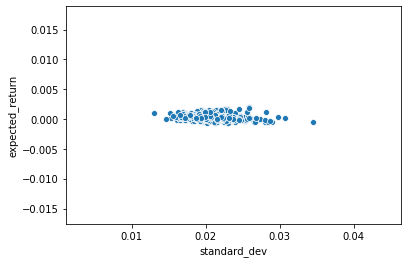

In [325]:
sb.scatterplot(data=res[res['expected_return']<1000] ,x='standard_dev',y='expected_return')

In [ ]:
 returns_history[symbol] = returns_history[symbol][-min_length:]

In [322]:
import matplotlib.pyplot as plt
import sys
import pathlib
import numpy as np
from random import sample



def show_frontier(symbols):
    #print(f'Symbols: {symbols}')
    returns_history =symbols
    symbols=symbols.columns

    #print(f'Min hisotry length = {min_length}')

    for symbol in symbols:
        returns_history[symbol] = returns_history[symbol]

    #for symbol in symbols:
    #    print(
    #       f'History for symbol {symbol} has {len(returns_history[symbol])} records')

    mean_returns = dict()
    variances = dict()
    standard_deviations = dict()

    for symbol in symbols:
        history = returns_history[symbol]
        history_length = len(history)
        #print(f'Return history for symbol {symbol} has {history_length} records')
        mean_returns[symbol] = np.mean(history)
        variances[symbol] = np.var(history)
        standard_deviations[symbol] = np.sqrt(variances[symbol])

    portfolio_returns = []
    portfolio_deviations = []
    port ={}
    for i in range(0, 1000):
       
        randoms = np.random.random_sample((5,))
        
        stocks = sample(symbols.to_list(),k=5)
        weights = [random / sum(randoms) for random in randoms]
        #weights = [0.25]*4
        expected_return = sum([weights[i] * mean_returns[symbol]
                               for i, symbol in enumerate(stocks)])
        
       

        weights_times_deviations = [
            weights[i]**2 * standard_deviations[symbol]**2 for i, symbol in enumerate(stocks)]
        variance = sum(weights_times_deviations)

        for i in range(0, len(stocks)):
            for j in range(0, len(stocks)):
                if (i != j):
                    symbol1 = symbols[i]
                    symbol2 = symbols[j]
                    #print('Pair = %s %s' % (symbol1, symbol2))

                    weight1 = weights[i]
                    weight2 = weights[j]
                    #print('Weights = %s %s' % (weight1, weight2))

                    deviation1 = standard_deviations[symbol1]
                    deviation2 = standard_deviations[symbol2]
                    #print('Deviations = %s %s' % (deviation1, deviation2))

                    correlation = np.corrcoef(
                        returns_history[symbol1], returns_history[symbol2])[0][1]
                    #print('Correlation = %f' % correlation)

                    additional_variance = weight1 * weight2 * deviation1 * deviation2 * correlation
                    #print('Additional variance = %f' % additional_variance)

                    variance += additional_variance

        standard_deviation = np.sqrt(variance)
        #print('Portfolio expected return = %f' % expected_return)
        #print('Portfolio standard deviation = %f' % standard_deviation)
      
   

        portfolio_returns.append(expected_return)
        portfolio_deviations.append(standard_deviation)
        dic = {"standard_dev":portfolio_deviations,"expected_return": portfolio_returns}
    return dic



